# What the Project is About

### This project focuses on Anomaly Detection in Network Traffic using unsupervised learning methods.

### We're working with network connection records from the KDD Cup 1999 dataset.

### The goal is to detect anomalies (attacks) in network traffic without using labels to train the model.

## Step 1: 📦 Import Libraries

In [26]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Model
from keras.layers import Input, Dense
from keras import regularizers
from sklearn.model_selection import train_test_split

## Step 2: 📥 Load Dataset

In [27]:
import os


folder_path = '/Users/sumanthoruganti/Desktop/archive (4)'

# List all files to see the exact filename
files = os.listdir(folder_path)
for f in files:
    print(f)


kddcup.testdata.unlabeled
kddcup.data_10_percent
.DS_Store
kddcup.newtestdata_10_percent_unlabeled.gz
kddcup.testdata.unlabeled_10_percent
kddcup.data_10_percent.gz
kddcup.names
corrected.gz
training_attack_types
kddcup.testdata.unlabeled_10_percent.gz
kddcup.data_10_percent_corrected
kddcup.testdata.unlabeled.gz
kddcup.data.gz
kddcup.newtestdata_10_percent_unlabeled
kddcup.data
kddcup.data.corrected
typo-correction.txt
corrected


In [30]:
import os

folder_path = '/Users/sumanthoruganti/Desktop/archive (4)'
files = os.listdir(folder_path)

for f in files:
    if "corrected" in f.lower():  # safer match
        print("Found:", repr(f))


Found: 'corrected.gz'
Found: 'kddcup.data_10_percent_corrected'
Found: 'kddcup.data.corrected'
Found: 'corrected'


In [31]:
import pandas as pd

file_path = '/Users/sumanthoruganti/Desktop/archive (4)/kddcup.data_10_percent_corrected'

# Try loading with default encoding
try:
    df = pd.read_csv(file_path, header=None)
except:
    # If encoding error occurs, fall back to latin1
    df = pd.read_csv(file_path, header=None, encoding='latin1')

print("✅ Dataset loaded successfully!")
df.head()


✅ Dataset loaded successfully!


,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


## Step 3: Assign Proper Column Names

In [32]:
column_names = [
    'duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes',
    'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins',
    'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root',
    'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds',
    'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate',
    'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
    'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
    'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
    'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate',
    'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'label'
]

df.columns = column_names
df.head()


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


## Step 4: Encode Categorical Features and Scale the Data

In [33]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encode categorical features
categorical_cols = ['protocol_type', 'service', 'flag']
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# Separate features and labels
X = df.drop('label', axis=1)
y = df['label'].copy()

# Convert 'normal' to 0 and others to 1 (anomalies)
y_binary = y.apply(lambda x: 0 if x == 'normal.' else 1)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


## Step 5: Isolation Forest

In [34]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, confusion_matrix

# Train model
iso_forest = IsolationForest(contamination=0.1, random_state=42)
y_pred_if = iso_forest.fit_predict(X_scaled)

# Convert output: 1 → 0 (normal), -1 → 1 (anomaly)
y_pred_if = [0 if x == 1 else 1 for x in y_pred_if]

# Evaluation
print("🔍 Isolation Forest Results:\n")
print(classification_report(y_binary, y_pred_if, target_names=["Normal", "Anomaly"]))

# Confusion matrix
cm_if = confusion_matrix(y_binary, y_pred_if)
print("Confusion Matrix:\n", cm_if)


🔍 Isolation Forest Results:

              precision    recall  f1-score   support

      Normal       0.18      0.80      0.29     97278
     Anomaly       0.61      0.08      0.14    396743

    accuracy                           0.22    494021
   macro avg       0.39      0.44      0.21    494021
weighted avg       0.52      0.22      0.17    494021

Confusion Matrix:
 [[ 78021  19257]
 [366598  30145]]


## Step 6: Visualize Results (Fit Graph)

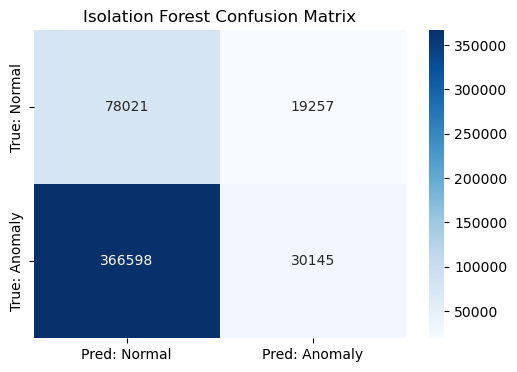

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.heatmap(cm_if, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Pred: Normal", "Pred: Anomaly"],
            yticklabels=["True: Normal", "True: Anomaly"])
plt.title("Isolation Forest Confusion Matrix")
plt.show()

## Step 7: Autoencoder (Deep Learning)

In [36]:
from sklearn.model_selection import train_test_split

# Train only on normal data (label 0)
X_train = X_scaled[y_binary == 0]

# Split into train-validation sets
X_train, X_val = train_test_split(X_train, test_size=0.2, random_state=42)


In [37]:
from keras.models import Model
from keras.layers import Input, Dense

input_dim = X_train.shape[1]

input_layer = Input(shape=(input_dim,))
encoded = Dense(32, activation='relu')(input_layer)
encoded = Dense(16, activation='relu')(encoded)
decoded = Dense(32, activation='relu')(encoded)
output_layer = Dense(input_dim, activation='linear')(decoded)

autoencoder = Model(inputs=input_layer, outputs=output_layer)
autoencoder.compile(optimizer='adam', loss='mse')


## Step 8: Train Autoencoder

In [39]:
history = autoencoder.fit(X_train, X_train,
                          epochs=50,
                          batch_size=64,
                          shuffle=True,
                          validation_data=(X_val, X_val))


Epoch 1/50
1216/1216 ━━━━━━━━━━━━━━━━━━━━ 1s 405us/step - loss: 0.0549 - val_loss: 0.1894
Epoch 2/50
1216/1216 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step - loss: 0.2222 - val_loss: 0.0648
Epoch 3/50
1216/1216 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step - loss: 0.0477 - val_loss: 0.1365
Epoch 4/50
1216/1216 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step - loss: 0.0604 - val_loss: 0.0916
Epoch 5/50
1216/1216 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step - loss: 0.0650 - val_loss: 0.0882
Epoch 6/50
1216/1216 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step - loss: 0.0426 - val_loss: 0.1969
Epoch 7/50
1216/1216 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step - loss: 0.0731 - val_loss: 0.0924
Epoch 8/50
1216/1216 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step - loss: 0.0402 - val_loss: 0.0636
Epoch 9/50
1216/1216 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step - loss: 0.0694 - val_loss: 0.0480
Epoch 10/50
1216/1216 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step - loss: 0.0350 - val_loss: 0.1750
Epoch 11/50
1216/1216 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step - loss: 0.1203 - val_loss: 0.0783
Epoch 12

## Step 9: Plot Training & Validation Loss

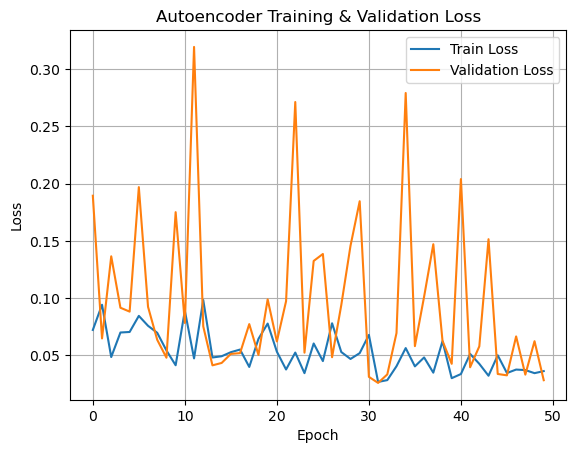

In [40]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Autoencoder Training & Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


## Step 10: Detect Anomalies using Autoencoder

In [41]:
# Predict reconstruction loss on entire data
reconstructions = autoencoder.predict(X_scaled)
mse = np.mean(np.power(X_scaled - reconstructions, 2), axis=1)

# Set threshold (based on training normal data reconstruction error)
threshold = np.percentile(mse[y_binary == 0], 95)
print("Reconstruction error threshold:", threshold)

# Predict anomalies
y_pred_ae = [1 if e > threshold else 0 for e in mse]


15439/15439 ━━━━━━━━━━━━━━━━━━━━ 3s 197us/step
Reconstruction error threshold: 0.034130707926565106


## Step 11: Evaluate Autoencoder

🔍 Autoencoder Results:

              precision    recall  f1-score   support

      Normal       1.00      0.95      0.97     97278
     Anomaly       0.99      1.00      0.99    396743

    accuracy                           0.99    494021
   macro avg       0.99      0.97      0.98    494021
weighted avg       0.99      0.99      0.99    494021



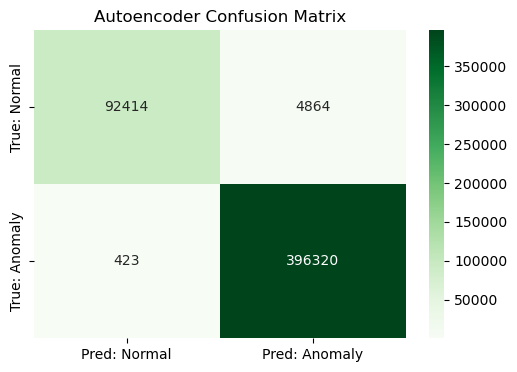

In [42]:
print("🔍 Autoencoder Results:\n")
print(classification_report(y_binary, y_pred_ae, target_names=["Normal", "Anomaly"]))

# Confusion Matrix
cm_ae = confusion_matrix(y_binary, y_pred_ae)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_ae, annot=True, fmt='d', cmap='Greens',
            xticklabels=["Pred: Normal", "Pred: Anomaly"],
            yticklabels=["True: Normal", "True: Anomaly"])
plt.title("Autoencoder Confusion Matrix")
plt.show()
